# Indian state Crop Yield Analysis Project

In [1]:


# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#  2. Load Dataset
df = pd.read_csv('crop_yield.csv')

print(df.shape)

(19689, 10)


 Data Cleaning & Preprocessing

In [4]:

# Check for missing values
print(df.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [5]:
# Fill missing numeric values with median
for col in ['Production', 'Yield', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with critical missing categorical values
df.dropna(subset=['Crop', 'State', 'Season', 'Crop_Year'], inplace=True)

# Remove outliers based on Production (Example: keep 1st to 99th percentile)
df = df[df['Production'].between(df['Production'].quantile(0.01), df['Production'].quantile(0.99))]

In [6]:
# ✅ 4. Calculated Fields
df['Production_per_Area'] = df['Production'] / df['Area']
df['Yield_per_Fertilizer'] = df['Yield'] / (df['Fertilizer'] + 1e-5)  # Avoid division by zero
df['YoY_Production_Growth'] = df.groupby(['Crop', 'State'])['Production'].pct_change() * 100

Visualizations

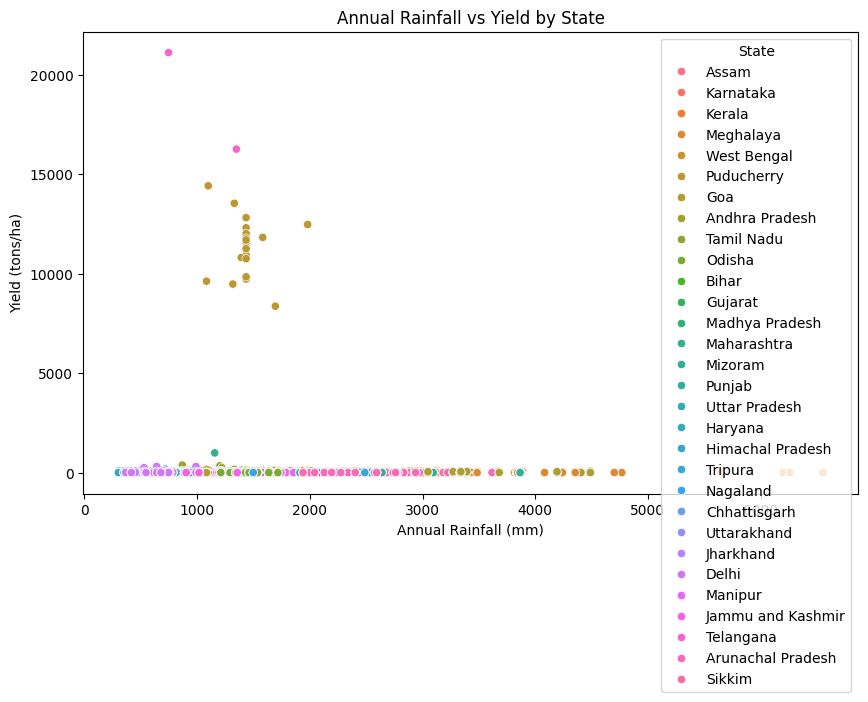

In [7]:
# ✅ 5. Visualizations
# (a) Annual Rainfall vs Yield
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual_Rainfall', y='Yield', hue='State')
plt.title('Annual Rainfall vs Yield by State')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Yield (tons/ha)')
plt.show()

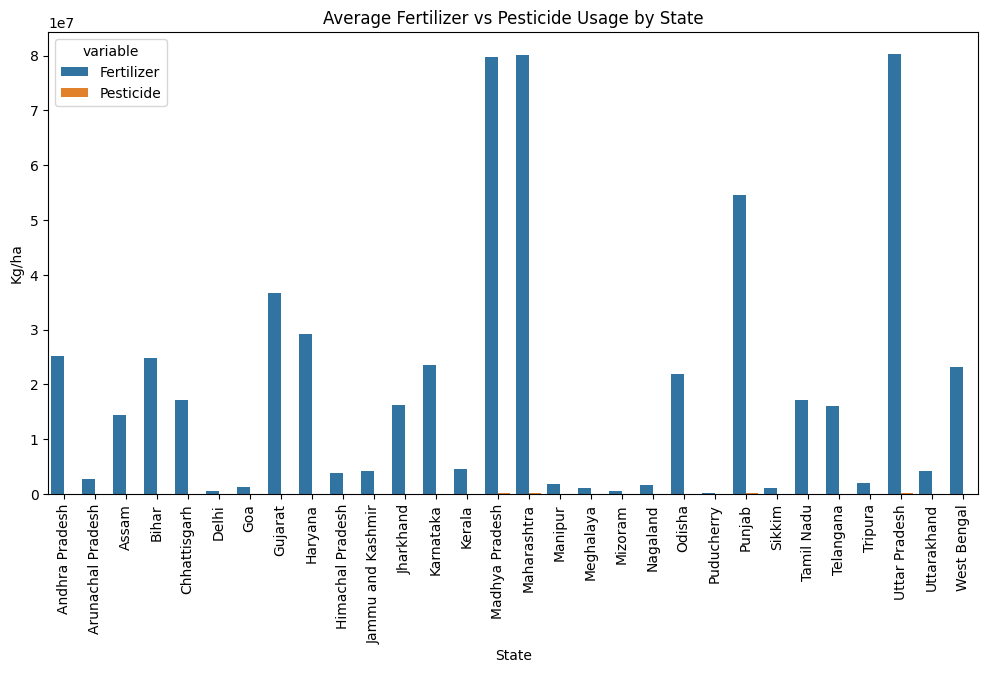

In [8]:
# (b) Fertilizer vs Pesticide Usage by State
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('State')[['Fertilizer', 'Pesticide']].mean().reset_index().melt(id_vars='State'),
            x='State', y='value', hue='variable')
plt.xticks(rotation=90)
plt.title('Average Fertilizer vs Pesticide Usage by State')
plt.ylabel('Kg/ha')
plt.show()

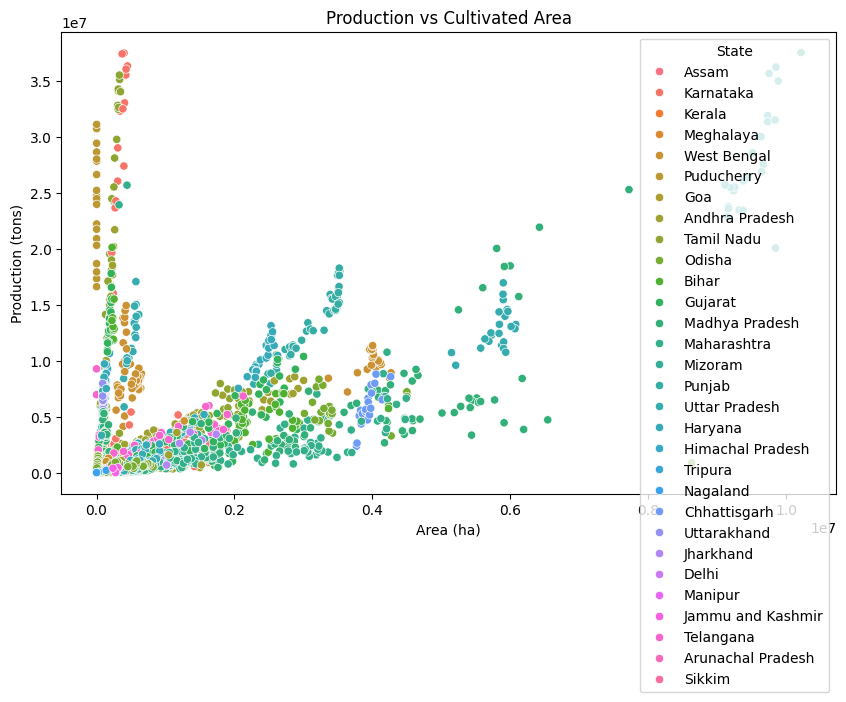

In [9]:
# (c) Production vs Area
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Area', y='Production', hue='State')
plt.title('Production vs Cultivated Area')
plt.xlabel('Area (ha)')
plt.ylabel('Production (tons)')
plt.show()

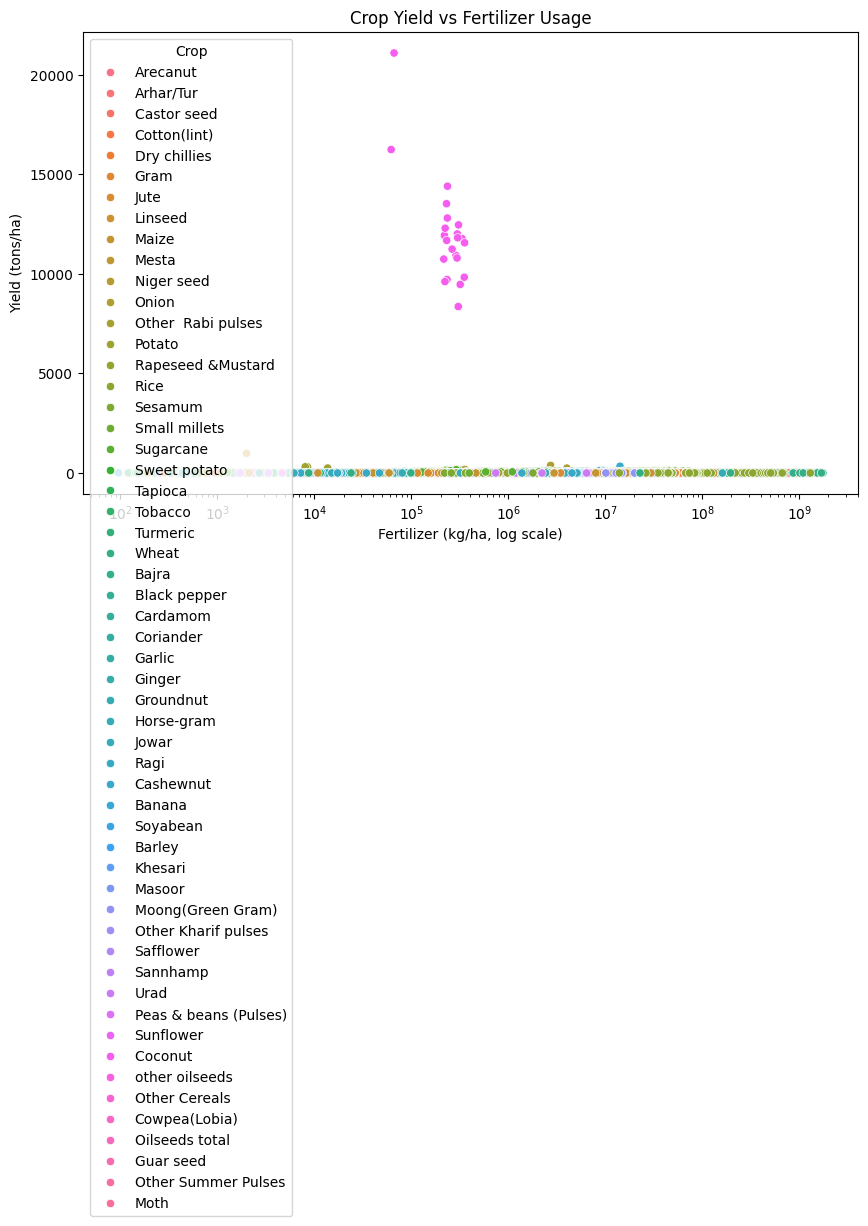

In [39]:
# (d) Crop Yield vs Fertilizer Usage
plt.figure(figsize=(10, 6)) # Adjusted figure size
sns.scatterplot(data=df, x='Fertilizer', y='Yield', hue='Crop') # Changed back to scatterplot
plt.xscale('log') # Apply log scale to the x-axis
plt.title('Crop Yield vs Fertilizer Usage')
plt.xlabel('Fertilizer (kg/ha, log scale)') # Update label
plt.ylabel('Yield (tons/ha)')
plt.show()

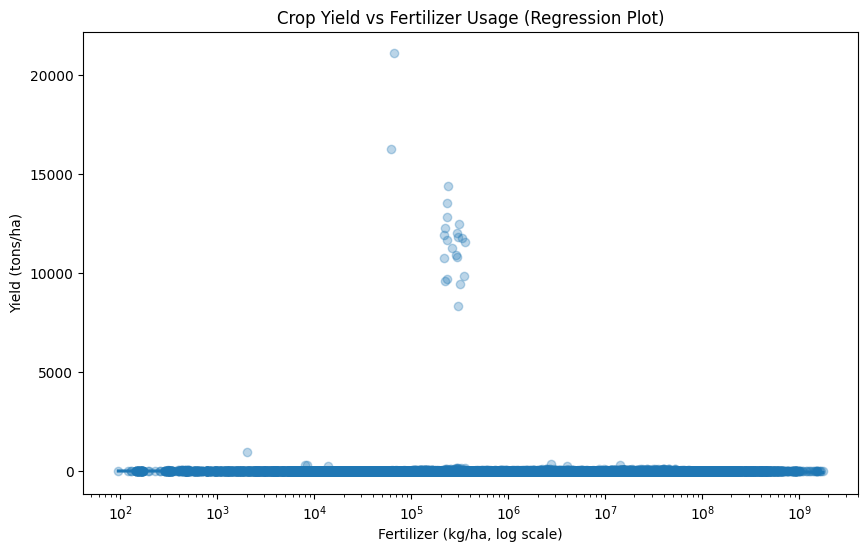

In [40]:
# Create a regression plot for Fertilizer vs Yield
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Fertilizer', y='Yield', scatter_kws={'alpha':0.3}) # Use regplot to show trend
plt.xscale('log') # Keep log scale for Fertilizer
plt.title('Crop Yield vs Fertilizer Usage (Regression Plot)')
plt.xlabel('Fertilizer (kg/ha, log scale)')
plt.ylabel('Yield (tons/ha)')
plt.show()

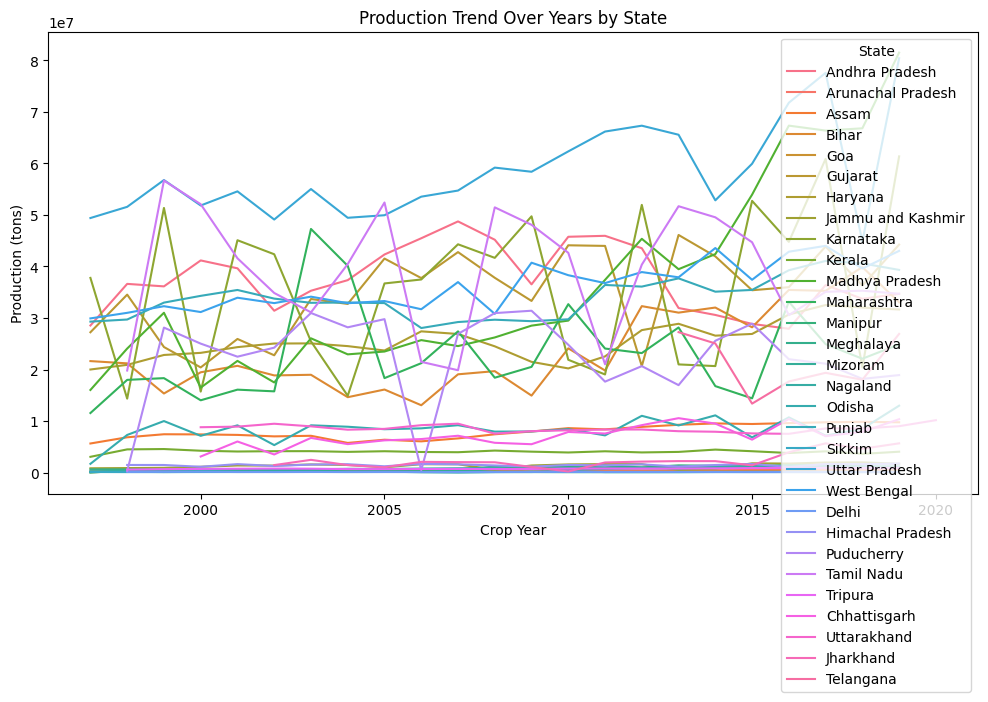

In [11]:

# (e) Production Trend Over Years
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby(['Crop_Year', 'State'])['Production'].sum().reset_index(),
             x='Crop_Year', y='Production', hue='State')
plt.title('Production Trend Over Years by State')
plt.xlabel('Crop Year')
plt.ylabel('Production (tons)')
plt.show()

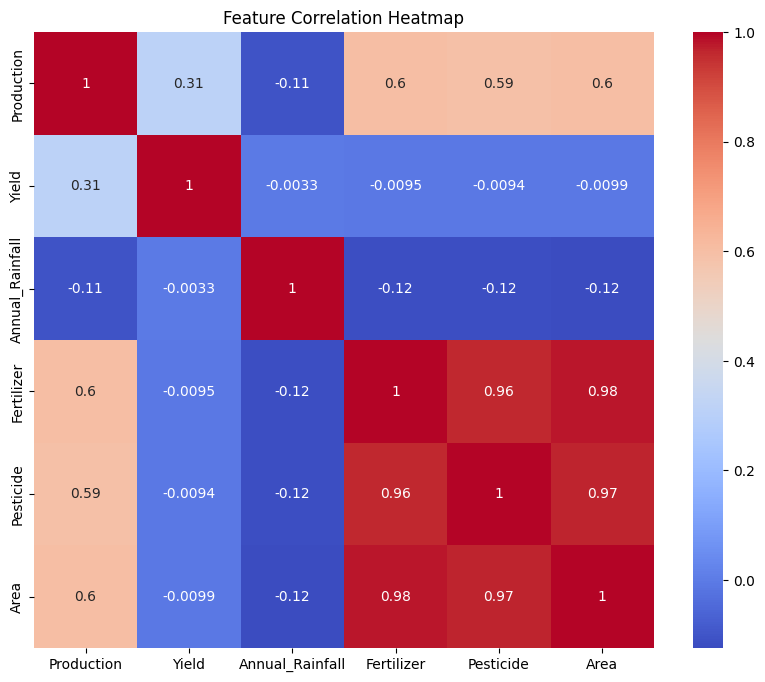

In [12]:
# (f) Heatmap for Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[['Production', 'Yield', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [26]:
# ✅ 6. Predictive Modeling (Simple Linear Regression)
# Predict Yield based on Rainfall and Fertilizer
X = df[['Annual_Rainfall', 'Fertilizer']]
y = df['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

Mean Squared Error: 3401437012622.65
R² Score: 0.48


In [28]:
import plotly.express as px

# Visualize Predicted vs Actual
fig = px.scatter(x=y_test, y=y_pred, title='Predicted vs Actual Crop Production', labels={'x': 'Actual Production', 'y': 'Predicted Production'})
fig.show()

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for square root
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Features & Target
X = df[['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']]
y = df['Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics

rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)


# Accuracy is not a standard metric for regression.

print(f'XGBoost Regressor Root Mean Squared Error: {rmse:.2f}') # Print RMSE
print(f'XGBoost Regressor R² Score: {r2:.4f}')



XGBoost Regressor Root Mean Squared Error: 537.08
XGBoost Regressor R² Score: -0.0169


In [21]:
# ✅ 7. Export Processed Data (Optional)
df.to_csv('processed_agriculture_data.csv', index=False)

# Complete Visualizations

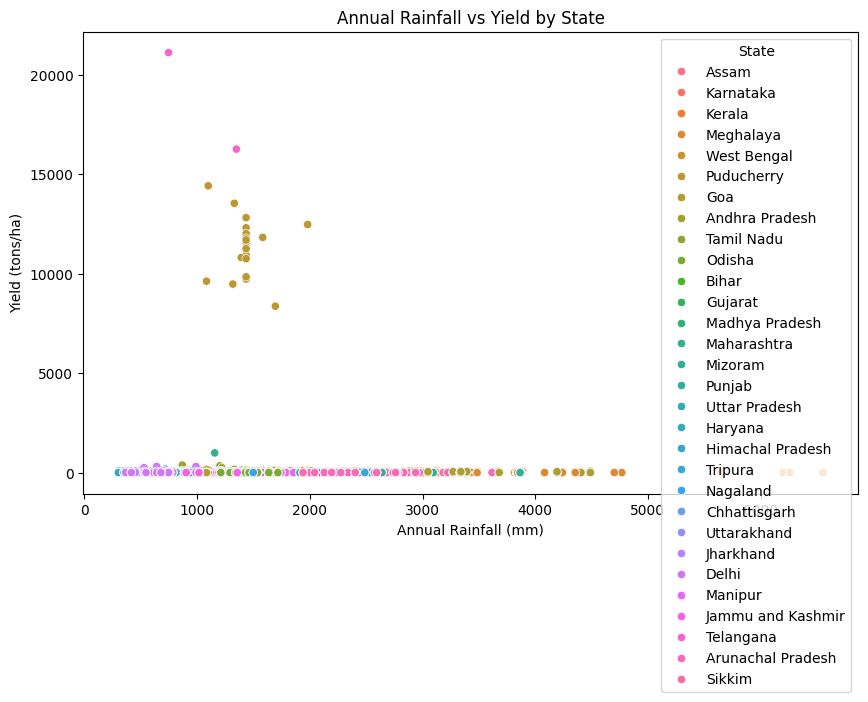

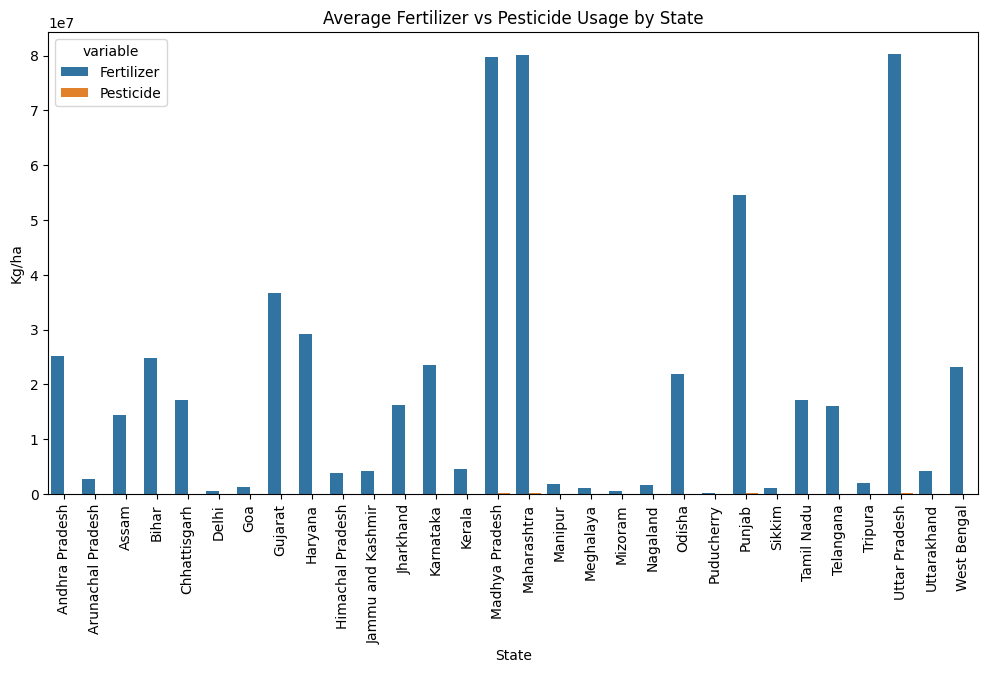

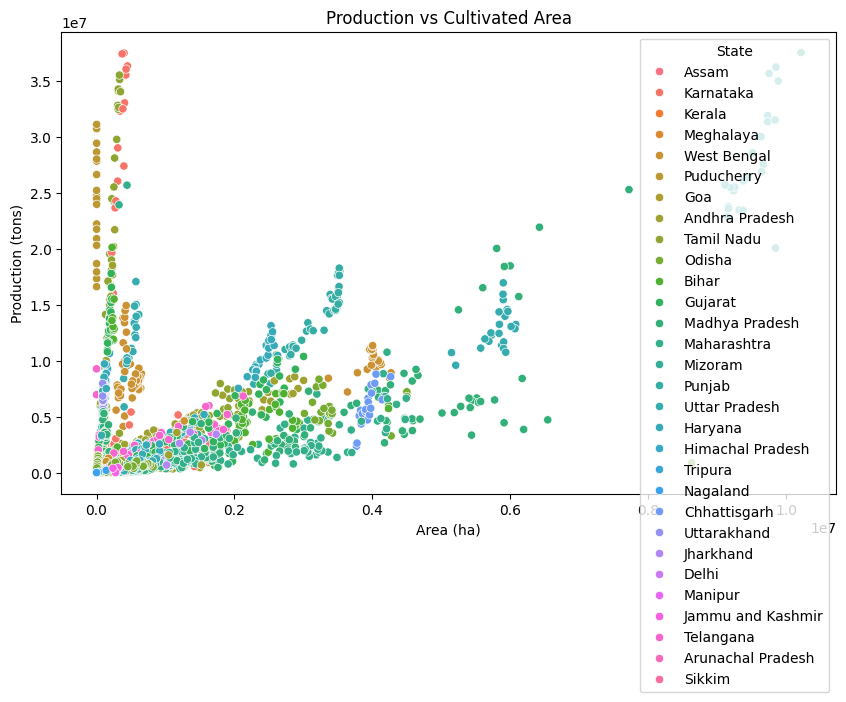

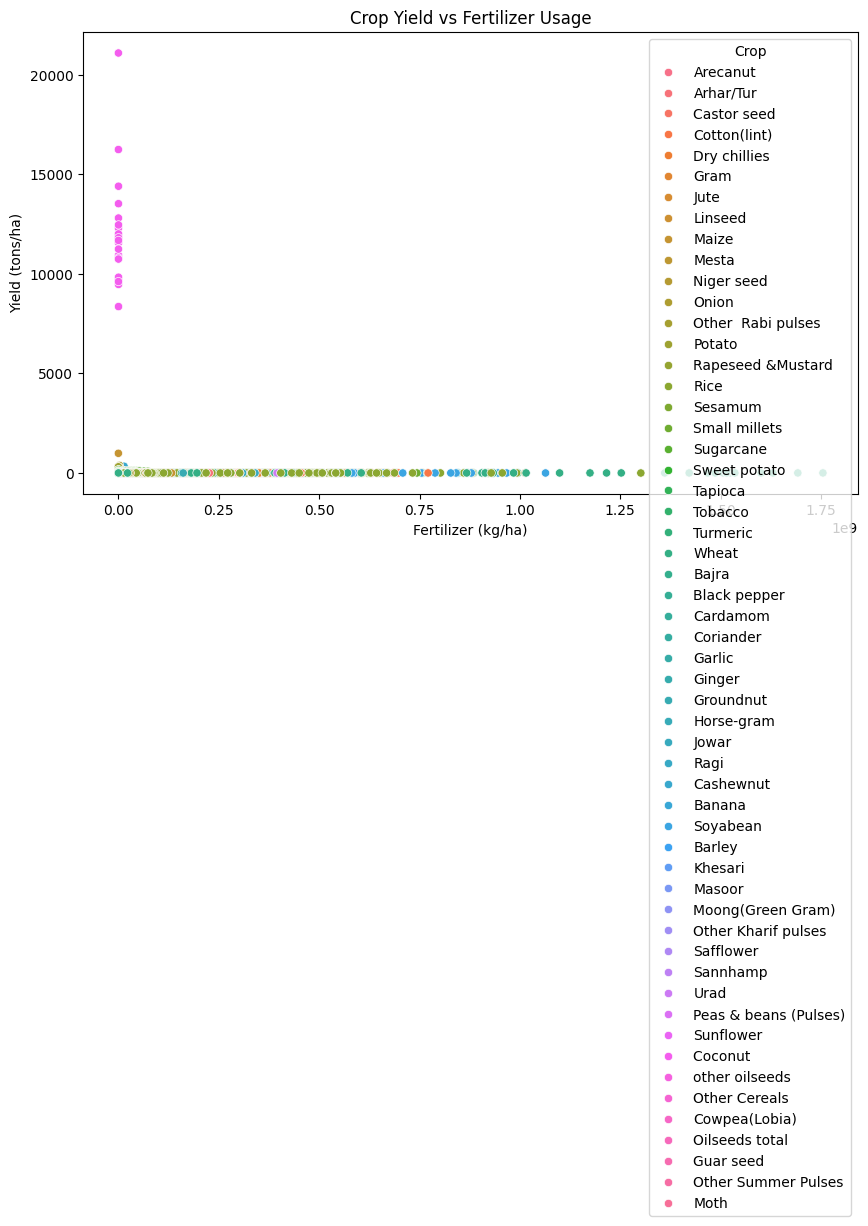

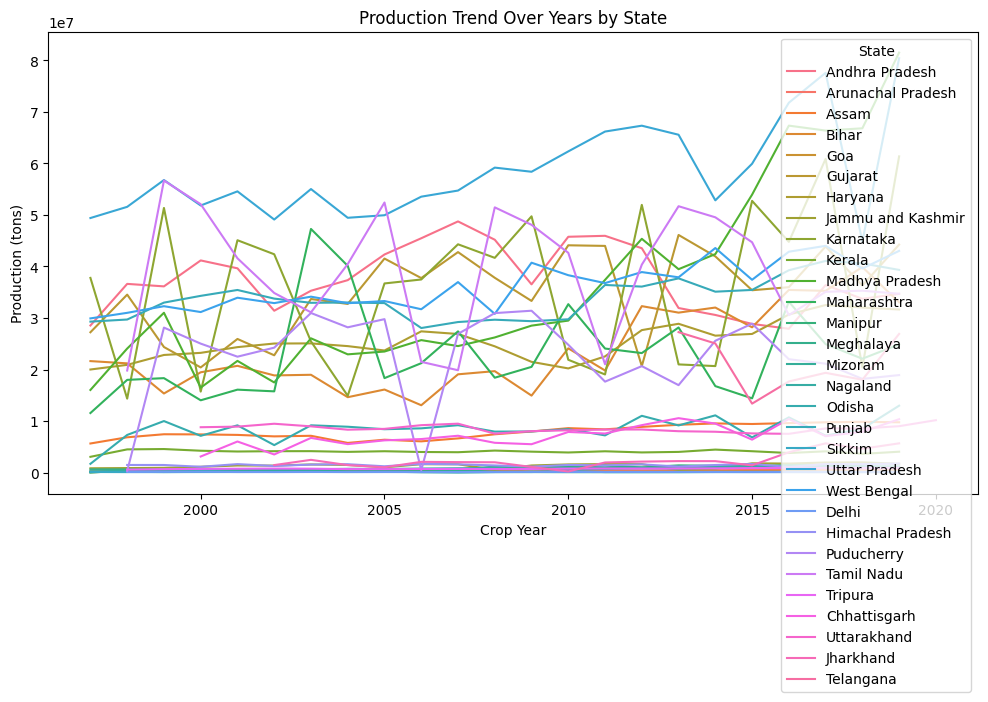

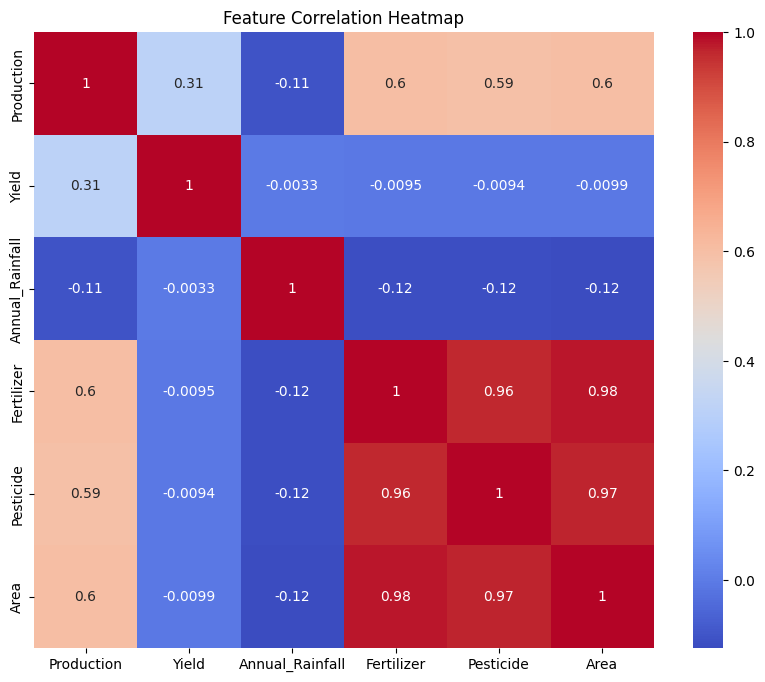

Mean Squared Error: 283667.03
R² Score: -0.00


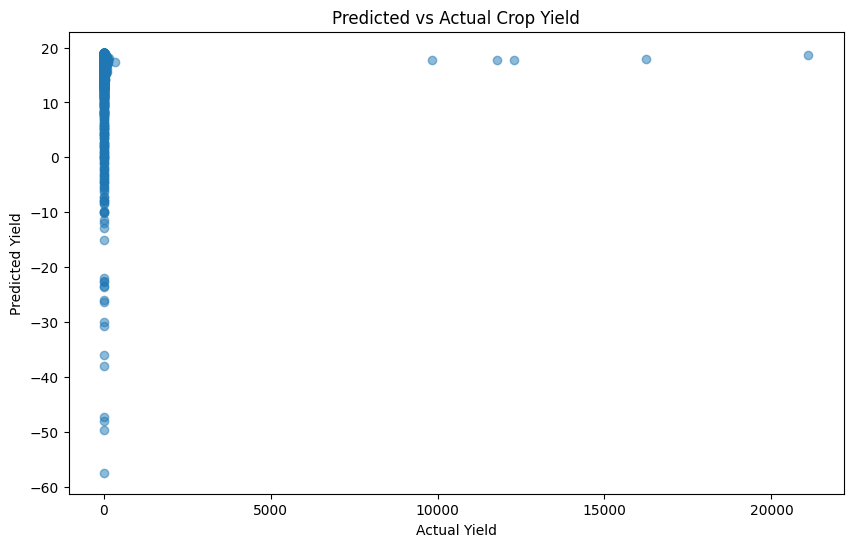

In [15]:


# ✅ 5. Visualizations

# (a) Annual Rainfall vs Yield
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual_Rainfall', y='Yield', hue='State')
plt.title('Annual Rainfall vs Yield by State')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Yield (tons/ha)')
plt.show()

# (b) Fertilizer vs Pesticide Usage by State
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('State')[['Fertilizer', 'Pesticide']].mean().reset_index().melt(id_vars='State'),
            x='State', y='value', hue='variable')
plt.xticks(rotation=90)
plt.title('Average Fertilizer vs Pesticide Usage by State')
plt.ylabel('Kg/ha')
plt.show()

# (c) Production vs Area
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Area', y='Production', hue='State')
plt.title('Production vs Cultivated Area')
plt.xlabel('Area (ha)')
plt.ylabel('Production (tons)')
plt.show()

# (d) Crop Yield vs Fertilizer Usage
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fertilizer', y='Yield', hue='Crop')
plt.title('Crop Yield vs Fertilizer Usage')
plt.xlabel('Fertilizer (kg/ha)')
plt.ylabel('Yield (tons/ha)')
plt.show()

# (e) Production Trend Over Years
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby(['Crop_Year', 'State'])['Production'].sum().reset_index(),
             x='Crop_Year', y='Production', hue='State')
plt.title('Production Trend Over Years by State')
plt.xlabel('Crop Year')
plt.ylabel('Production (tons)')
plt.show()

# (f) Heatmap for Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[['Production', 'Yield', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ✅ 6. Predictive Modeling (Simple Linear Regression)
# Predict Yield based on Rainfall and Fertilizer
X = df[['Annual_Rainfall', 'Fertilizer']]
y = df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

# Visualize Predicted vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs Actual Crop Yield')
plt.show()

# ✅ 7. Export Processed Data (Optional)
df.to_csv('processed_agriculture_data.csv', index=False)

In [16]:
import plotly.express as px

fig = px.scatter(df, x='Annual_Rainfall', y='Yield', title='Annual Rainfall vs Yield')
fig.show()